In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

def predictCLFmap(X,clf,h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z,xx,yy

In [2]:
batting = pd.read_csv('Batting.csv')
batting.head()
batting = batting.dropna()
batting.head()

batting.columns
batting['playerID'].value_counts()
pd.set_option('display.max_columns', None)
batting=batting.drop(columns=['teamID'])

class_names = ['inducted', 'not inducted']

In [3]:
# batting_final = pd.merge(minimum, batting, on=["playerID"])
batting_final = batting.drop(columns = ['yearID', 'lgID'])
batting_final = batting_final.groupby(['playerID'])
batting_final = batting_final.sum()
#getting rid of players who played less than 10 years
batting_final = batting_final[batting_final['stint'] >= 10]
#Getting rid of the pitchers
batting_final = batting_final[batting_final['AB'] >= 1000]

batting_final.head()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
playerID,,,,,,,,,,,,,,,,,,
aaronha01,22,3176,11896,2116,3640,597,92,742,2228.0,238.0,71.0,1374,1344.0,293.0,29.0,15.0,117.0,315.0
abbotku01,11,702,2044,273,523,109,23,62,242.0,22.0,11.0,133,571.0,11.0,17.0,21.0,12.0,37.0
abreubo01,22,2425,8480,1453,2470,574,59,288,1363.0,400.0,128.0,1476,1840.0,115.0,33.0,7.0,85.0,165.0
adairje01,17,1165,4019,378,1022,163,19,57,366.0,29.0,29.0,208,499.0,31.0,17.0,41.0,30.0,149.0
adamsma01,13,834,2385,294,618,129,6,118,397.0,4.0,4.0,161,634.0,16.0,12.0,0.0,16.0,48.0


In [4]:
hallOfFame = pd.read_csv('HallOfFame.csv')
hallOfFame = hallOfFame.drop(columns = ['needed_note'])
#Only want players in our data set 
hallOfFame = hallOfFame[hallOfFame['category'] == 'Player']
#only want players elected by BBWAA (the current form of voting)
hallOfFame = hallOfFame[hallOfFame['votedBy'] == 'BBWAA']
#creating percent needed as well as percent recieved
hallOfFame['threshold'] = hallOfFame['needed'] / hallOfFame['ballots']
hallOfFame['percent'] = hallOfFame['votes'] / hallOfFame['ballots']
hallOfFame.head(20)

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,threshold,percent
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,0.752212,0.982301
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,0.752212,0.951327
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,0.752212,0.951327
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,0.752212,0.907080
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,0.752212,0.836283
5,lajoina01,1936,BBWAA,226.0,170.0,146.0,N,Player,0.752212,0.646018
6,speaktr01,1936,BBWAA,226.0,170.0,133.0,N,Player,0.752212,0.588496
7,youngcy01,1936,BBWAA,226.0,170.0,111.0,N,Player,0.752212,0.491150
8,hornsro01,1936,BBWAA,226.0,170.0,105.0,N,Player,0.752212,0.464602
9,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,0.752212,0.353982


In [5]:
hitters = pd.merge(hallOfFame, batting_final, on=["playerID"])
hitters.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,threshold,percent,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,slaugen01,1966,BBWAA,302.0,227.0,100.0,N,Player,0.751656,0.331126,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
1,slaugen01,1967,BBWAA,292.0,219.0,123.0,N,Player,0.750000,0.421233,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
2,slaugen01,1968,BBWAA,283.0,213.0,129.0,N,Player,0.752650,0.455830,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
3,slaugen01,1969,BBWAA,340.0,255.0,128.0,N,Player,0.750000,0.376471,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
4,slaugen01,1970,BBWAA,300.0,225.0,133.0,N,Player,0.750000,0.443333,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0


In [6]:
# filtering out players who were not inducted on their first couple times on the ballot so each player is only in once
hitters = hitters.drop_duplicates(subset=['playerID'], keep='last')
hitters.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,threshold,percent,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
13,slaugen01,1979,BBWAA,432.0,324.0,297.0,N,Player,0.750000,0.687500,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
28,darkal01,1980,BBWAA,385.0,289.0,43.0,N,Player,0.750649,0.111688,12,776,3021,396,845,120,34,33,288.0,11.0,9.0,192,240.0,20.0,23.0,25.0,26.0,54.0
42,thomsbo01,1979,BBWAA,432.0,324.0,11.0,N,Player,0.750000,0.025463,10,682,2198,272,563,79,22,81,345.0,8.0,11.0,206,337.0,23.0,10.0,14.0,23.0,52.0
44,heganji01,1967,BBWAA,292.0,219.0,2.0,N,Player,0.750000,0.006849,10,436,1080,110,230,43,5,21,115.0,1.0,5.0,118,188.0,14.0,1.0,14.0,10.0,27.0
45,lockmwh01,1966,BBWAA,302.0,227.0,4.0,N,Player,0.751656,0.013245,10,601,1679,192,432,46,9,26,116.0,10.0,12.0,139,99.0,15.0,6.0,19.0,9.0,16.0


In [7]:
inducted = hitters[hitters['inducted'] == 'Y']
inducted

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,threshold,percent,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
91,snidedu01,1980,BBWAA,385.0,289.0,333.0,Y,Player,0.750649,0.864935,10,1156,3432,594,970,162,34,216,659.0,22.0,23.0,559,655.0,104.0,9.0,22.0,26.0,83.0
102,berrayo01,1972,BBWAA,396.0,297.0,339.0,Y,Player,0.750000,0.856061,10,1067,3591,529,975,144,12,177,640.0,14.0,8.0,372,235.0,49.0,27.0,4.0,37.0,73.0
138,mantlmi01,1974,BBWAA,365.0,274.0,322.0,Y,Player,0.750685,0.882192,14,1890,6208,1288,1854,255,45,452,1163.0,128.0,24.0,1434,1328.0,126.0,13.0,8.0,43.0,100.0
143,matheed01,1978,BBWAA,379.0,285.0,301.0,Y,Player,0.751979,0.794195,16,1951,6954,1223,1874,279,55,400,1157.0,51.0,29.0,1173,1228.0,107.0,21.0,27.0,51.0,99.0
187,drysddo01,1984,BBWAA,403.0,303.0,316.0,Y,Player,0.751861,0.784119,14,547,1169,96,218,26,7,29,113.0,0.0,2.0,60,370.0,0.0,5.0,69.0,6.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,griffke02,2016,BBWAA,440.0,330.0,437.0,Y,Player,0.750000,0.993182,24,2671,9801,1662,2781,524,38,630,1836.0,184.0,69.0,1312,1779.0,246.0,81.0,8.0,102.0,199.0
1081,rodriiv01,2017,BBWAA,442.0,332.0,336.0,Y,Player,0.751131,0.760181,25,2543,9592,1354,2844,572,51,311,1332.0,127.0,64.0,513,1474.0,67.0,58.0,31.0,76.0,337.0
1083,guerrvl01,2018,BBWAA,422.0,317.0,392.0,Y,Player,0.751185,0.928910,16,2147,8155,1328,2590,477,46,449,1496.0,181.0,94.0,737,985.0,250.0,103.0,0.0,64.0,277.0
1100,jonesch06,2018,BBWAA,422.0,317.0,410.0,Y,Player,0.751185,0.971564,19,2499,8984,1619,2726,549,38,468,1623.0,150.0,46.0,1512,1409.0,177.0,18.0,3.0,97.0,253.0


In [8]:
not_inducted = hitters[hitters['inducted'] == 'N']
not_inducted

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,threshold,percent,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
13,slaugen01,1979,BBWAA,432.0,324.0,297.0,N,Player,0.750000,0.687500,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0
28,darkal01,1980,BBWAA,385.0,289.0,43.0,N,Player,0.750649,0.111688,12,776,3021,396,845,120,34,33,288.0,11.0,9.0,192,240.0,20.0,23.0,25.0,26.0,54.0
42,thomsbo01,1979,BBWAA,432.0,324.0,11.0,N,Player,0.750000,0.025463,10,682,2198,272,563,79,22,81,345.0,8.0,11.0,206,337.0,23.0,10.0,14.0,23.0,52.0
44,heganji01,1967,BBWAA,292.0,219.0,2.0,N,Player,0.750000,0.006849,10,436,1080,110,230,43,5,21,115.0,1.0,5.0,118,188.0,14.0,1.0,14.0,10.0,27.0
45,lockmwh01,1966,BBWAA,302.0,227.0,4.0,N,Player,0.751656,0.013245,10,601,1679,192,432,46,9,26,116.0,10.0,12.0,139,99.0,15.0,6.0,19.0,9.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,damonjo01,2018,BBWAA,422.0,317.0,8.0,N,Player,0.751185,0.018957,18,2490,9736,1668,2769,522,109,235,1139.0,408.0,103.0,1003,1257.0,38.0,50.0,57.0,71.0,93.0
1106,matsuhi01,2018,BBWAA,422.0,317.0,4.0,N,Player,0.751185,0.009479,10,1236,4442,656,1253,249,12,175,760.0,13.0,9.0,547,689.0,35.0,21.0,0.0,46.0,106.0
1107,leeca01,2018,BBWAA,422.0,317.0,1.0,N,Player,0.751185,0.002370,18,2099,7983,1125,2273,469,19,358,1363.0,125.0,47.0,655,984.0,60.0,47.0,3.0,98.0,206.0
1108,hudsoor01,2018,BBWAA,422.0,317.0,0.0,N,Player,0.751185,0.000000,13,1345,4825,648,1319,256,66,93,542.0,85.0,28.0,483,825.0,21.0,30.0,33.0,42.0,138.0


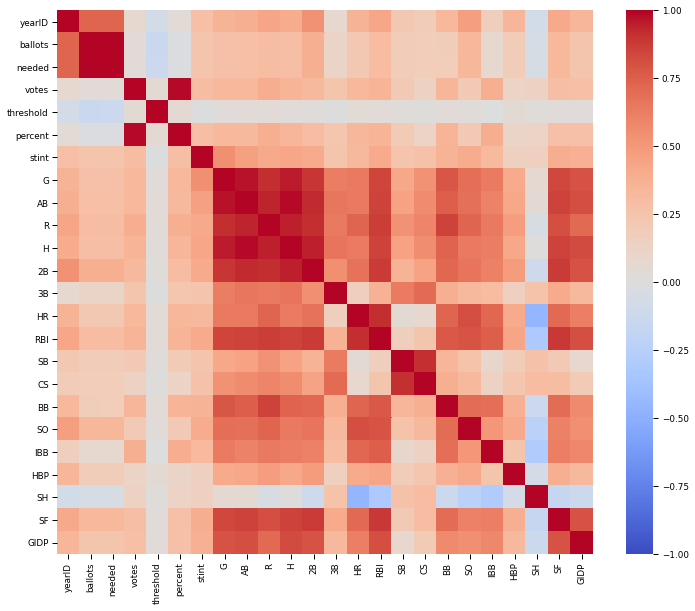

In [9]:
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(hitters.corr(), annot=False, vmin=-1, vmax=1,cmap ="coolwarm"); 

In [10]:
hitters['inducted'].value_counts().to_frame()

,inducted
N,413
Y,61


In [11]:
y = hitters['inducted']
le = LabelEncoder()
le.fit(y)
classes = le.classes_
y_enc=le.transform(y)
hitters['inducted_enc'] = le.transform(y) #now 1=M; 0=B

hitters = hitters.drop(['ballots', 'needed', 'votes', 'threshold', 'percent', 'playerID', 'yearID', 'votedBy', 'category', 'inducted'], axis=1)
hitters.head()

,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,inducted_enc
13,11,491,1046,157,288,43,11,22,137.0,7.0,6.0,152,101.0,11.0,3.0,9.0,10.0,24.0,0
28,12,776,3021,396,845,120,34,33,288.0,11.0,9.0,192,240.0,20.0,23.0,25.0,26.0,54.0,0
42,10,682,2198,272,563,79,22,81,345.0,8.0,11.0,206,337.0,23.0,10.0,14.0,23.0,52.0,0
44,10,436,1080,110,230,43,5,21,115.0,1.0,5.0,118,188.0,14.0,1.0,14.0,10.0,27.0,0
45,10,601,1679,192,432,46,9,26,116.0,10.0,12.0,139,99.0,15.0,6.0,19.0,9.0,16.0,0


In [12]:
hitters_class_0    = hitters[hitters['inducted_enc'] == 1] #class with fewer samples
hitters_class_1    = hitters[hitters['inducted_enc'] == 0] #class with more samples
count_class_0 = len(hitters_class_0)
count_class_1 = len(hitters_class_1)

print(count_class_0)
print(count_class_1)

61
413


In [13]:
Y = hitters['inducted_enc']
X = hitters.drop(['inducted_enc'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,Y, stratify = y, test_size=.3, random_state=325)

In [14]:
smote = SMOTE(sampling_strategy='minority', k_neighbors = 2)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)

Accuracy : 67.83 %


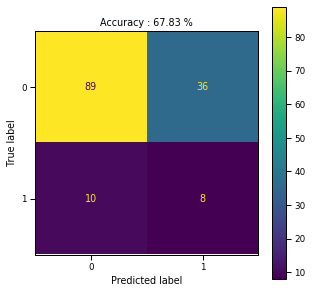

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       125
           1       0.18      0.44      0.26        18

    accuracy                           0.68       143
   macro avg       0.54      0.58      0.53       143
weighted avg       0.81      0.68      0.73       143



In [15]:
clf = MultinomialNB()
clf.fit(X_oversample, y_oversample);

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Accuracy : {} %".format(round(acc*100, 2)))

fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

print(classification_report(y_test, clf.predict(X_test)))

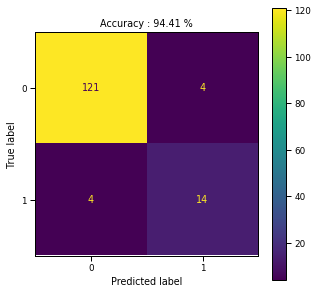

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.62970
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.37030
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       125
           1       0.78      0.78      0.78        18

    accuracy                           0.94       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.94      0.94      0.94       143



In [24]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)
clf.fit(X_oversample, y_oversample)
predicted = clf.predict(X_test)
acc = accuracy_score(y_test, predicted)
cm = confusion_matrix(y_test, predicted)

fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 2)))
plt.show()

importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
print(classification_report(y_test, clf.predict(X_test)))

Games, Hits, and Intentional walks are the three features used with Hits and IBB being the most important

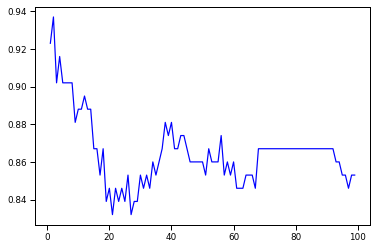

Parameter k=2 gave the maximum accuracy: 0.9370629370629371


In [17]:
def get_accuracy(k):
    # Build the k-NN classifier
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_oversample, y_oversample)
    # Compute predictions
    y_predict = clf.predict(X_test)
    return accuracy_score(y_test, y_predict)

k_values = list(range(1, 100))
acc_values = [get_accuracy(k) for k in k_values]
plt.plot(k_values, acc_values, color='blue')
plt.show()
best_index = np.argmax(acc_values)
print("Parameter k={} gave the maximum accuracy: {}".format(k_values[best_index], acc_values[best_index]))

kNN Classifier Model with Testing Data:
0.9370629370629371


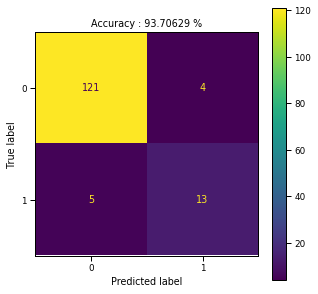

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       125
           1       0.78      0.78      0.78        18

    accuracy                           0.94       143
   macro avg       0.87      0.87      0.87       143
weighted avg       0.94      0.94      0.94       143



In [18]:
k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_oversample, y_oversample)
predicted = model.predict(X_test)
acc = accuracy_score(y_test, predicted)
print("kNN Classifier Model with Testing Data:")
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict))

fig,ax = plt.subplots(1,1,figsize=(5, 5))
cmd=ConfusionMatrixDisplay(cm) 
cmd.plot(ax=ax)
plt.title("Accuracy : {} %".format(round(acc*100, 5)))
plt.show()

print(classification_report(y_test, clf.predict(X_test)))